In [50]:
# Import the Pandas library
import pandas as pd

In [51]:
# Load data from 'orders.csv' with 'date' as index and parsed as date
df = pd.read_csv("orders.csv", parse_dates=True, index_col = ['date'])

In [52]:
# Preview the last five entries in the DataFrame
df.tail()

,orders,marketing_investment,discount_rate
date,,,
2022-12-27,27450.6,302.904844,0.070321
2022-12-28,29131.6,303.511201,0.073613
2022-12-29,19133.3,300.464154,0.006089
2022-12-30,18347.7,297.994770,0.005196
2022-12-31,12451.0,300.681191,0.009529


In [53]:
# Retrieve and print a statistical summary of the DataFrame
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
             orders  marketing_investment  discount_rate
count   1826.000000           1826.000000    1826.000000
mean   16102.564239            190.488288       0.011012
std     7048.729220             52.782529       0.015189
min     4925.700000             76.739679       0.002250
25%    10769.175000            149.182568       0.004157
50%    14673.650000            186.819914       0.006233
75%    20026.800000            229.652842       0.010576
max    93604.900000            352.655988       0.126732


In [54]:
# Import the required Matplotlib library for plotting
import matplotlib.pyplot as plt

Text(0, 0.5, 'Orders')

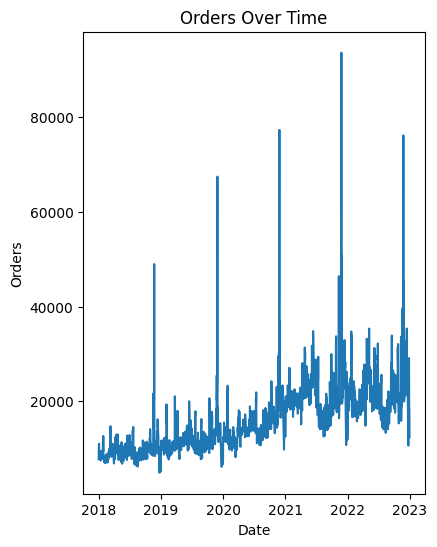

In [55]:
# Initialize a figure for the subplots
plt.figure(figsize=(15, 6))
 
# Create a subplot to visualize 'orders' over time
plt.subplot(1, 3, 1)
plt.plot(df.index, df['orders'])
plt.title('Orders Over Time')
plt.xlabel('Date')
plt.ylabel('Orders')

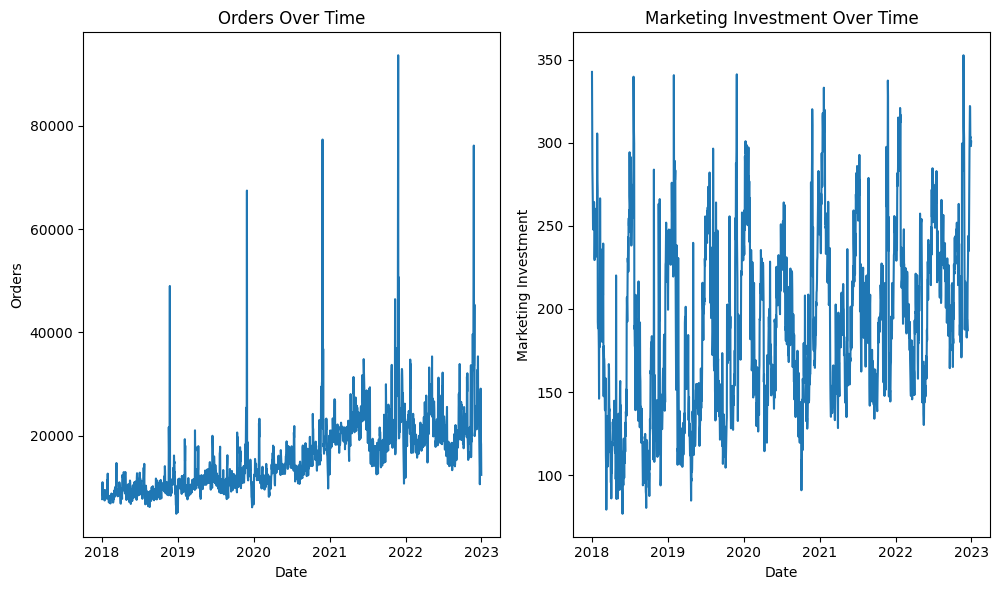

In [56]:
# Initialize a figure for the subplots
plt.figure(figsize=(15, 6))
 
# Create a subplot to visualize 'orders' over time
plt.subplot(1, 3, 1)
plt.plot(df.index, df['orders'])
plt.title('Orders Over Time')
plt.xlabel('Date')
plt.ylabel('Orders')
 
# Add a subplot to visualize 'marketing_investment' over time
plt.subplot(1, 3, 2)
plt.plot(df.index, df['marketing_investment'])
plt.title('Marketing Investment Over Time')
plt.xlabel('Date')
plt.ylabel('Marketing Investment')
 
# Adjust the layout and display the figure
plt.tight_layout()
plt.show()

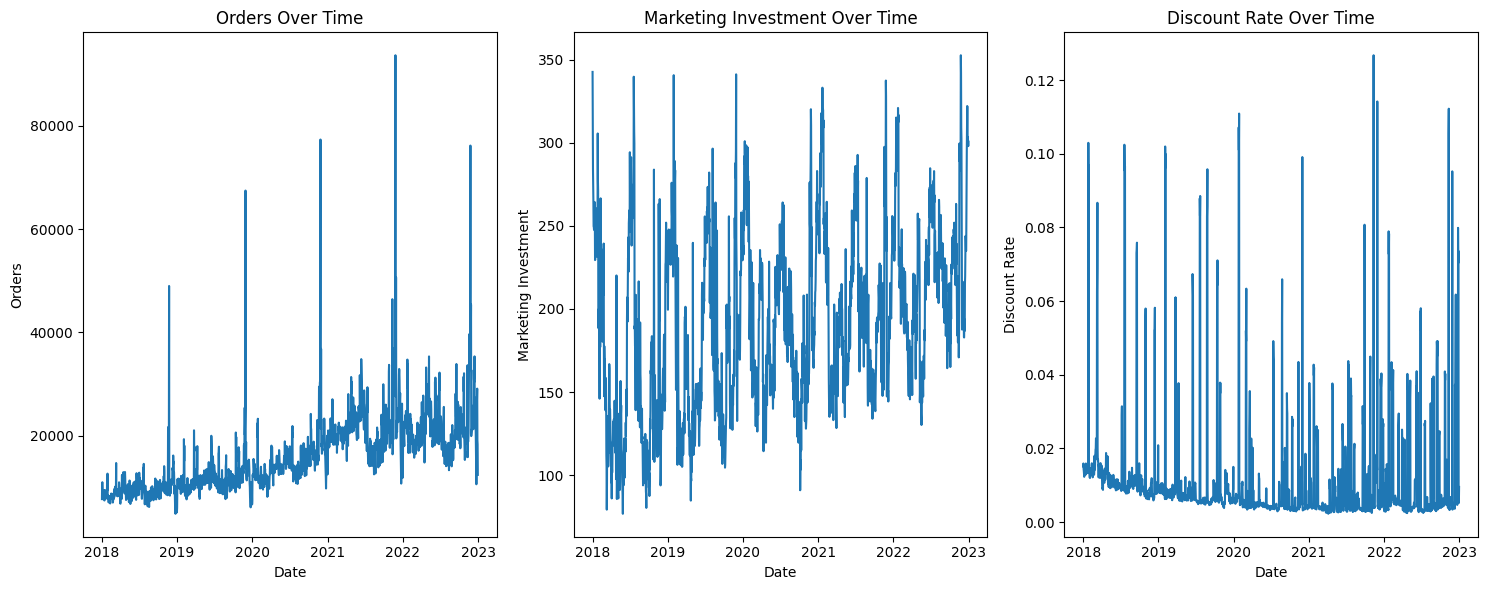

In [57]:
# Initialize a figure for the subplots
plt.figure(figsize=(15, 6))
 
# Create a subplot to visualize 'orders' over time
plt.subplot(1, 3, 1)
plt.plot(df.index, df['orders'])
plt.title('Orders Over Time')
plt.xlabel('Date')
plt.ylabel('Orders')
 
# Add a subplot to visualize 'marketing_investment' over time
plt.subplot(1, 3, 2)
plt.plot(df.index, df['marketing_investment'])
plt.title('Marketing Investment Over Time')
plt.xlabel('Date')
plt.ylabel('Marketing Investment')
 
# Add a subplot to visualize 'discount_rate' over time
plt.subplot(1, 3, 3)
plt.plot(df.index, df['discount_rate'])
plt.title('Discount Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Discount Rate')
 
# Adjust the layout and display the figure
plt.tight_layout()
plt.show()

In [58]:
# Required Libraries
from statsmodels.tsa.seasonal import STL

In [59]:
# Decompose the 'orders' time series using STL
stl = STL(df['orders'], period=365)  # Assuming daily data and 365 days for seasonality
result = stl.fit()

In [60]:
# Extract the trend, seasonal, and residual components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

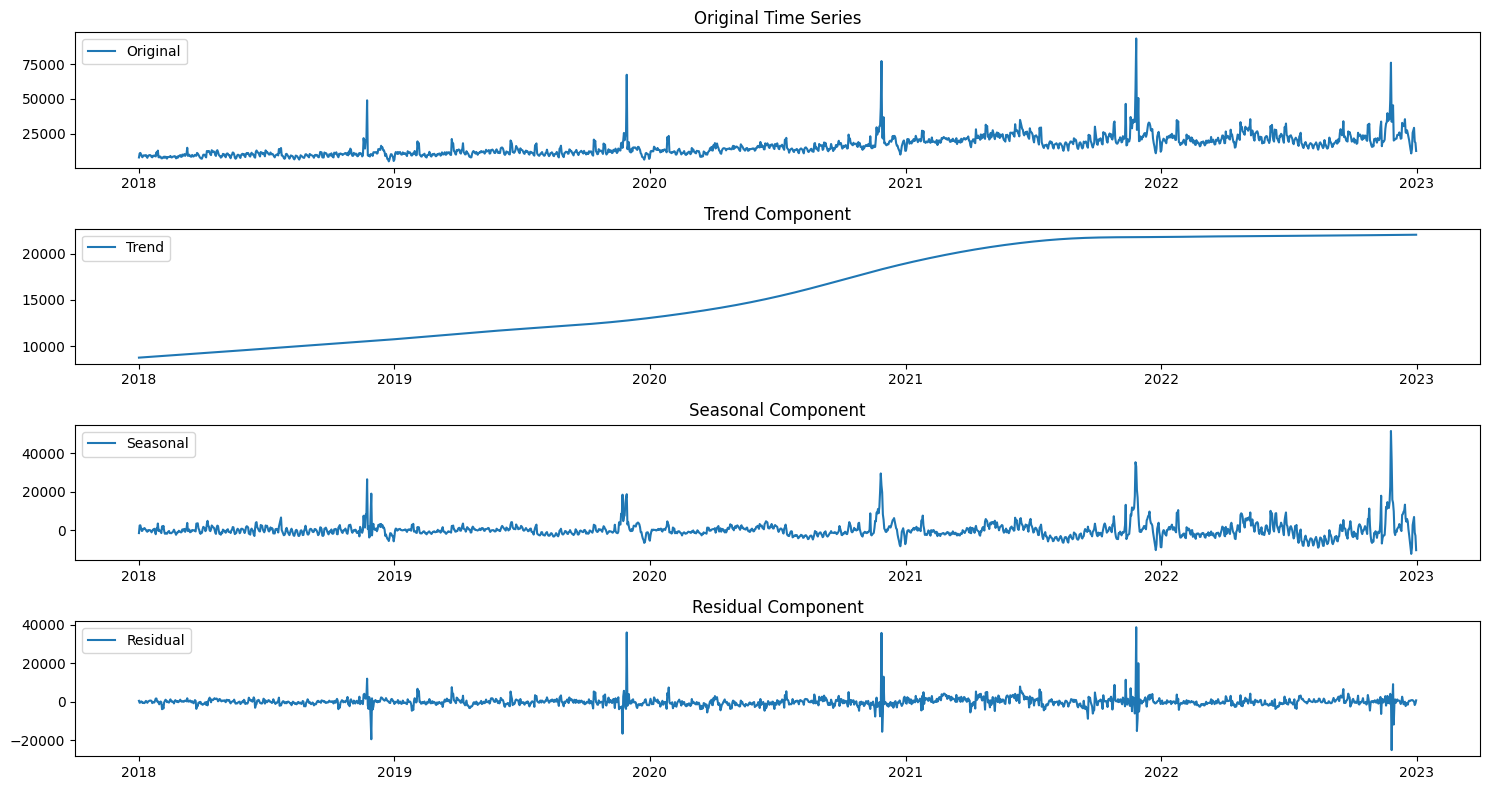

In [61]:
# Plotting
plt.figure(figsize=(15, 8))
 
# Original Data
plt.subplot(4, 1, 1)
plt.plot(df.index, df['orders'], label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series')
 
# Trend Component
plt.subplot(4, 1, 2)
plt.plot(df.index, trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')
 
# Seasonal Component
plt.subplot(4, 1, 3)
plt.plot(df.index, seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal Component')
 
# Residual Component
plt.subplot(4, 1, 4)
plt.plot(df.index, residual, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual Component')
 
plt.tight_layout()
plt.show()

In [62]:
# Add trend and seasonal components to the dataframe
df['trend'] = result.trend
df['seasonal'] = result.seasonal

In [63]:
# We'll need to remove any remaining NaN values after decomposition
df.dropna(inplace=True)

In [64]:
# Preview the DataFrame
df.head()

,orders,marketing_investment,discount_rate,trend,seasonal
date,,,,,
2018-01-01,7766.7,342.634293,0.015126,8755.194669,-1522.105256
2018-01-02,10686.5,304.345270,0.015907,8760.481296,2420.759849
2018-01-03,11032.3,284.074519,0.014387,8765.768729,2521.026909
2018-01-04,10034.9,275.267608,0.013852,8771.056972,1003.363837
2018-01-05,8452.1,264.312049,0.012928,8776.346029,-435.974023


In [65]:
# Required Libraries
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [66]:
# Preprocess data for LSTM
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

In [67]:
# Isolate X and Y
X = scaled_data[:, 1:]
y = scaled_data[:, 0]   

In [68]:
# Reshape X for LSTM
X = X.reshape((X.shape[0], 1, X.shape[1]))

In [69]:
# Split data into training and test sets
X_train, X_test = X[:-31], X[-31:]
y_train, y_test = y[:-31], y[-31:]

In [70]:
# LSTM Model architecture
model = Sequential()
model.add(LSTM(50, 
               activation='relu', 
               input_shape=(X_train.shape[1], 
                            X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mae')

In [71]:
# Train the LSTM model
model.fit(X_train, y_train, epochs=50, verbose=1)

Epoch 1/50


57/57 [==============================] - 1s 2ms/step - loss: 0.0585
Epoch 2/50
57/57 [==============================] - 0s 2ms/step - loss: 0.0291
Epoch 3/50
57/57 [==============================] - 0s 1ms/step - loss: 0.0249
Epoch 4/50
57/57 [==============================] - 0s 1ms/step - loss: 0.0232
Epoch 5/50
57/57 [==============================] - 0s 1ms/step - loss: 0.0215
Epoch 6/50
57/57 [==============================] - 0s 2ms/step - loss: 0.0199
Epoch 7/50
57/57 [==============================] - 0s 1ms/step - loss: 0.0182
Epoch 8/50
57/57 [==============================] - 0s 1ms/step - loss: 0.0167
Epoch 9/50
57/57 [==============================] - 0s 1ms/step - loss: 0.0160
Epoch 10/50
57/57 [==============================] - 0s 1ms/step - loss: 0.0153
Epoch 11/50
57/57 [==============================] - 0s 1ms/step - loss: 0.0149
Epoch 12/50
57/57 [==============================] - 0s 1ms/step - loss: 0.0152
Epoch 13/50
57/57 [==============================] - 0s 1ms/

In [72]:
# Importing the metric utilities
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [73]:
# Predicting the orders for the last 31 days
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 162ms/step


In [74]:
# Setting up a zero matrix to facilitate the reverse scaling process
num_features = df.shape[1]
zero_matrix = np.zeros((y_pred.shape[0], num_features - 1))
 
# Merging the predictions with the zero matrix
inverse_input = np.hstack((y_pred, zero_matrix))
 
# Reverting the scaling to obtain predicted values in the original order magnitude
predicted_orders = scaler.inverse_transform(inverse_input)[:, 0]

In [75]:
# Retrieving the actual orders for the last 31 days
actual_orders = df['orders'].values[-31:]

In [76]:
# Calculating Mean Absolute Error
MAE = mean_absolute_error(actual_orders, predicted_orders)
 
# Calculating Mean Absolute Percentage Error
MAPE = mean_absolute_percentage_error(actual_orders, predicted_orders)

In [77]:
# Printing the derived performance metrics
print(f"Mean Absolute Error (MAE): {MAE}")
print(f"Mean Absolute Percentage Error (MAPE): {MAPE}%")

Mean Absolute Error (MAE): 1371.444343113321
Mean Absolute Percentage Error (MAPE): 0.055240728152531934%


In [78]:
# Importing the Dropout layer from Keras
from tensorflow.keras.layers import Dropout


In [79]:
# Setting up an advanced LSTM architecture
advanced_model = Sequential()
 
# First LSTM layer along with Dropout
advanced_model.add(LSTM(100, 
                        activation='relu', 
                        return_sequences=True,
                        input_shape=(X_train.shape[1], X_train.shape[2])))
advanced_model.add(Dropout(0.2))
 
# Second LSTM layer followed by Dropout
advanced_model.add(LSTM(50, activation='relu'))
advanced_model.add(Dropout(0.2))
 
# Final Dense layer
advanced_model.add(Dense(1))

In [80]:
# Compiling the model
advanced_model.compile(optimizer='adam', loss='mae')
 
# Model training
advanced_model.fit(X_train, y_train, epochs=50, verbose=1)

Epoch 1/50
57/57 [==============================] - 2s 3ms/step - loss: 0.0571
Epoch 2/50
57/57 [==============================] - 0s 4ms/step - loss: 0.0309
Epoch 3/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0275
Epoch 4/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0258
Epoch 5/50
57/57 [==============================] - 0s 5ms/step - loss: 0.0238
Epoch 6/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0220
Epoch 7/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0209
Epoch 8/50
57/57 [==============================] - 0s 7ms/step - loss: 0.0197
Epoch 9/50
57/57 [==============================] - 0s 4ms/step - loss: 0.0198
Epoch 10/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0196
Epoch 11/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0190
Epoch 12/50
57/57 [==============================] - 0s 5ms/step - loss: 0.0185
Epoch 13/50
57/57 [==============================

In [81]:
# Making predictions with the advanced model
y_pred_advanced = advanced_model.predict(X_test)

1/1 [==============================] - 0s 390ms/step


In [82]:
# Constructing an inverse input matrix with predictions and zero columns
inverse_input_advanced = np.hstack((y_pred_advanced, zero_matrix))
 
# Undoing the scaling to get predicted values in the original order magnitude
predicted_orders_advanced = scaler.inverse_transform(inverse_input_advanced)[:, 0]

In [83]:
# Calculating the Mean Absolute Error for the advanced model
MAE_advanced = mean_absolute_error(actual_orders, predicted_orders_advanced)
 
# Calculating the Mean Absolute Percentage Error for the advanced model
MAPE_advanced = mean_absolute_percentage_error(actual_orders, predicted_orders_advanced)
 
# Displaying the computed metrics
print(f"Advanced Model - Mean Absolute Error (MAE): {MAE_advanced}")
print(f"Advanced Model - Mean Absolute Percentage Error (MAPE): {MAPE_advanced}%")

Advanced Model - Mean Absolute Error (MAE): 1207.2205264552947
Advanced Model - Mean Absolute Percentage Error (MAPE): 0.048882181728550446%


In [84]:
from datetime import timedelta

In [85]:
def create_advanced_lstm_model(input_shape):
    model = Sequential()
    # Adding the first LSTM layer with 50 units and ReLU activation.
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=input_shape))
    
    # Adding the second LSTM layer with 50 units and ReLU activation.
    model.add(LSTM(50, activation='relu'))
    
    # Adding a dense layer with 25 units and ReLU activation.
    model.add(Dense(25, activation='relu'))
    
    # Adding the output dense layer with a single unit.
    model.add(Dense(1))
    
    # Compiling the LSTM model.
    model.compile(optimizer='adam', loss='mae')
    
    return model

In [86]:
def rolling_forecast_evaluation_advanced(df, start_date, forecast_length=30, step=15):
    MAEs = []  # List to store Mean Absolute Errors.
    MAPEs = []  # List to store Mean Absolute Percentage Errors.
 
    current_date = pd.to_datetime(start_date)
    
    # Continue as long as the end date doesn't exceed the final date in the dataset.
    while current_date < df.index[-1] - timedelta(days=forecast_length):
        
        # Define training and test periods based on current_date.
        train_end = current_date
        test_start = train_end + timedelta(days=1)
        test_end = test_start + timedelta(days=forecast_length - 1)
 
        # Split data into training and test sets.
        train = df[:train_end]
        test = df[test_start:test_end]
 
        # Normalize train and test data.
        scaler = MinMaxScaler()
        train_scaled = scaler.fit_transform(train)
        test_scaled = scaler.transform(test)
 
        # Create train and test sets for X (features) and y (target).
        X_train, y_train = train_scaled[:, 1:], train_scaled[:, 0]
        X_test, y_test = test_scaled[:, 1:], test_scaled[:, 0]
 
        # Adjust data shape for LSTM input.
        X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
        X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
 
        # Create and train the model.
        model = create_advanced_lstm_model((X_train.shape[1], X_train.shape[2]))
        model.fit(X_train, y_train, epochs=50, verbose=0)
 
        # Forecast with the trained model.
        y_pred = model.predict(X_test)
        
        # Process the predictions for inverse scaling.
        inverse_input = np.hstack((y_pred, np.zeros((y_pred.shape[0], df.shape[1]-1))))
        predicted = scaler.inverse_transform(inverse_input)[:, 0]
        actual = test['orders'].values
 
        # Calculate error metrics.
        MAE = mean_absolute_error(actual, predicted)
        MAPE = mean_absolute_percentage_error(actual, predicted)
        
        # Append the errors to their respective lists.
        MAEs.append(MAE)
        MAPEs.append(MAPE)
 
        # Advance the current_date by the specified step.
        current_date += timedelta(days=step)
 
    return MAEs, MAPEs

In [87]:
# Set the start date for the rolling forecast evaluation.
start_date = '2022-01-01'
MAEs, MAPEs = rolling_forecast_evaluation_advanced(df, start_date)

1/1 [==============================] - 0s 321ms/step


In [88]:
# Display the MAE and MAPE for each evaluation window and their averages.
print(f"Average MAE: {np.mean(MAEs)}")
print(f"Average MAPE: {np.mean(MAPEs)}%")

Average MAE: 1536.3248870854352
Average MAPE: 0.06904917529925862%


In [89]:
from tensorflow.keras.optimizers import SGD, Adam

In [90]:
def create_tuned_model(neurons=50, optimizer=Adam, dropout_rate=0.0):
    # Initialize a sequential model
    model = Sequential()
    
    # Add the first LSTM layer with the 'relu' activation function
    model.add(LSTM(neurons, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    
    # Add the second LSTM layer with the 'relu' activation function
    model.add(LSTM(neurons, activation='relu'))
    
    # Add a Dense layer which has half the number of neurons compared to the LSTM layers and uses the 'relu' activation function
    model.add(Dense(neurons//2, activation='relu'))
    
    # Add an output Dense layer to produce a single output value
    model.add(Dense(1))
    
    # Compile the model with the provided optimizer and Mean Absolute Error as the loss function
    model.compile(optimizer=optimizer(), loss='mae')
    return model

In [91]:
# Define hyperparameters to be tested
neurons = [30, 50]
optimizer_classes = [SGD, Adam]
dropout_rate = [0.0, 0.2]
 
# Generate all combinations of hyperparameters
all_params = [(n, o, d) for n in neurons for o in optimizer_classes for d in dropout_rate]

In [92]:
# Initialize variables to track best hyperparameters and scores
best_mae_params = None
best_mae_score = float('inf')
best_mape_params = None
best_mape_score = float('inf')
results = []

In [93]:
# Define starting date and calculate number of time series splits
start_date = pd.Timestamp('2022-01-01')
num_splits = (365 - 30) // 15

In [94]:
# Loop over all hyperparameter combinations
for params in all_params:
    total_mae = 0.0
    total_mape = 0.0
    n, o, d = params
    print(n, 0, d)

30 0 0.0
30 0 0.2
30 0 0.0
30 0 0.2
50 0 0.0
50 0 0.2
50 0 0.0
50 0 0.2


In [ ]:
# Loop over all hyperparameter combinations
for params in all_params:
    total_mae = 0.0
    total_mape = 0.0
    n, o, d = params
    
    # Sliding window cross-validation over 2022 data
    for i in range(0, 365 - 30, 15): 
        split_date = start_date + pd.Timedelta(days=i)
        train = df[df.index < split_date]
        test = df[(df.index >= split_date) & (df.index < split_date + pd.Timedelta(days=30))]
        
        # Preprocessing, scaling
        scaler = MinMaxScaler()
        train_scaled = scaler.fit_transform(train)
        test_scaled = scaler.transform(test)
        
        X_train, y_train = train_scaled[:, 1:], train_scaled[:, 0]
        X_test, y_test = test_scaled[:, 1:], test_scaled[:, 0]
        
        X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
        X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
        
        # Create and fit the model
        model = create_tuned_model(neurons=n, optimizer=o, dropout_rate=d)
        model.fit(X_train, y_train, epochs=50, verbose=0)
        
        # Predict and evaluate
        y_pred = model.predict(X_test)
        inverse_input = np.hstack((y_pred, np.zeros((y_pred.shape[0], df.shape[1] - 1))))
        y_pred_rescaled = scaler.inverse_transform(inverse_input)[:, 0]
        
        # Convert predictions and test targets back to the original scale
        inverse_input_test = np.hstack((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], df.shape[1] - 1))))
        y_test_rescaled = scaler.inverse_transform(inverse_input_test)[:, 0]
        
        # Compute the evaluation metrics.
        mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
        mape = mean_absolute_percentage_error(y_test_rescaled, y_pred_rescaled)
 
        # adding the MAPE and MAE for each fold
        total_mae += mae
        total_mape += mape
 
    # Computing the Average MAE and MAPE
    avg_mae = total_mae / num_splits
    avg_mape = total_mape / num_splits
 
    # Storing the results
    results.append({'params': params,
                    'avg_mae': avg_mae,
                    'avg_mape': avg_mape
                   })
 
    if avg_mae < best_mae_score:
        best_mae_score = avg_mae
        best_mae_params = params
    
    if avg_mape < best_mape_score:
        best_mape_score = avg_mape
        best_mape_params = params
    

1/1 [==============================] - 0s 354ms/step


: 

In [ ]:
#hi
# Print the best MAE and MAPE scores with their respective hyperparameters
print(f"Best MAE: {best_mae_score}")
print(f"Best MAPE: {best_mape_score}")
print(f"Best Hyperparameters for MAE - Neurons: {best_mae_params[0]}, Optimizer: {best_mae_params[1].__name__}, Dropout Rate: {best_mae_params[2]}")